# kNN para detección de anomalías

Aplicamos el método kNN basado en vecinos más cercanos para detección de anomalías.

Utilizamos la librería PyOD que es una biblioteca de Python para detectar anomalías en datos multivariados. La biblioteca fue desarrollada por Yue Zhao.

Paso 1. Instalar la librería PyOD

In [ ]:
!pip install PyOD

Paso 2. Importamos las librerías que necesitamos

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pyod.models.knn import KNN 
from pyod.utils.data import generate_data
from pyod.utils.example import visualize
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score

Paso 3. Generamos datos sintéticos. En este caso, vamos a trabajar con datos de entrenamiento y datos de test, tal y como se ha explicado en clase. Para tener un conjunto considerable de datos de forma rápida, vamos a generarlos utilizando el método generate_data que nos permite definir el número de instancias, las dimensiones y el porcentaje de outliers que queremos.

Rercordamos que aunque el algoritmo no usará el atributo que determina si es una anomalía o no para realizar su procesamiento, las tenemos disponibles con la finalidad de comparar los resultados.

In [10]:
# Porcentaje de outliers que vamos a considerar
contamination = 0.1  

#Número de ejemplos de entrenamiento y test que vamos a utilizar
n_train = 200  
n_test = 100  

# Generamos los datos, considerando 2 dimensiones y las características anteriores
# Utilizamos como generador de datos aleatorios (random_state) la semilla 12, 
# para que en todas las pruebas obtengamos los mismos datos.
X_train, X_test, y_train, y_test = generate_data(n_train=n_train, n_test=n_test, n_features=2, behaviour='new', contamination=contamination,random_state=12)


Paso 4. Visualizamos los datos que hemos generado para train (entrenamiento) y test (prueba), lo representamos en diferente color los puntos que son anomalías de los que no.


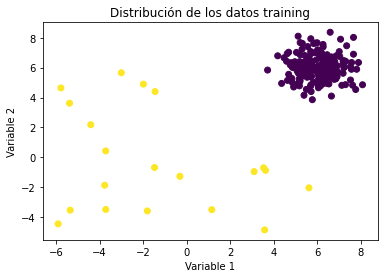

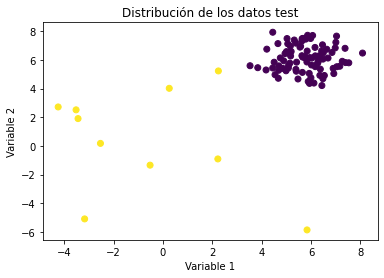

In [11]:
#Creamos una nueva variable DataFrame para que incorpore en los datos de entrenamiento
# el atributo la etiqueta de anomalía o no.
# Lo usamos solamente para la representación, los datos que usará el modelo sigue
#sin tener esa información
XY_train = pd.DataFrame({"Variable 1": X_train[:,0], "Variable 2": X_train[:,1], "Anomalía": y_train})

#Lo representamos gráficamente poniendo el color en función de si es anómalo o no
plt.scatter(XY_train['Variable 1'], XY_train['Variable 2'], c=XY_train['Anomalía'])
plt.xlabel('Variable 1')
plt.ylabel('Variable 2')
plt.title("Distribución de los datos training")
plt.show()

#Creamos una nueva variable DataFrame para que incorpore en los datos de test 
# el atributo la etiqueta de anomalía o no solamente para la representación. 
# El conjunto de test que usaremos en el modelo sigue sin tener esa información
XY_test = pd.DataFrame({"Variable 1": X_test[:,0], "Variable 2": X_test[:,1], "Anomalía": y_test})

#Lo representamos gráficamente poniendo el color en función de si es anómalo o no
plt.scatter(XY_test['Variable 1'], XY_test['Variable 2'], c=XY_test['Anomalía'])
plt.xlabel('Variable 1')
plt.ylabel('Variable 2')
plt.title("Distribución de los datos test")
plt.show()

Paso 4. Entrenamos el modelo kNN utilizando la librería pyOD

Parámetros:

    n_neighbors : integer, (defecto = 5) - El número de vecinos que se van a utilizar.
    
    contamination: float (0., 0.5), (defecto = 0.1)) – La cantidad de contaminación del conjunto de datos. La proporción de valores atípicos en el conjunto de datos. Se utiliza cuando para definir el umbral en la función de decisión.
    
    method : string, (defecto = 'largest') {'largest', 'mean', 'median'} - 'largest': usa la ditancia al kth vecino como medida de outlier, 'mean': usa la media de todos los k vecinos como medida de outlier, 'median': usa la mediana de la distancia a los k vecinos como medida de outlier.
    
    metric : string, (defecto = 'minkowski') - la métrica usada para calcular las distancias. Se pueden usar las métricas disponibles en scikit-learn, por ejemplo: ['cityblock', 'cosine', 'euclidean', 'l1', 'l2','manhattan']. También desde: scipy.spatial.distance: ['braycurtis', 'canberra', 'chebyshev', 'correlation', 'dice', 'hamming', 'jaccard', 'kulsinski', 'mahalanobis', 'matching', 'minkowski', 'rogerstanimoto', 'russellrao', 'seuclidean', 'sokalmichener', 'sokalsneath', 'sqeuclidean', 'yule']
    
    p : integer, (defecto = 2) - parámetro que se usa para la distancia de Minkowski. Cuando p = 1, es equivalente a usar la distancia de manhattan (l1) y si p=2, es equivalente a la distancia euclídea (l2).


In [12]:
# Indicamos que utilizamos el método kNN y lo entrenamos usando el método fit
clf_name = 'kNN'
clf = KNN(n_neighbors=5, method='largest', metric = 'minkowski', contamination=0.1)
clf.fit(X_train)

KNN(algorithm='auto', contamination=0.1, leaf_size=30, method='largest',
  metric='minkowski', metric_params=None, n_jobs=1, n_neighbors=5, p=2,
  radius=1.0)

Paso 5. Obtenemos los valores predichos por el modelo para los datos de train y de test. Obtenemos tanto la etiqueta binaria que le asigna este método a cada instancia, como las puntuaciones que se le asignan. De nuevo, usamos los métodos dados por la librería PyOD.

In [ ]:
# Obtenemos las etiquetas y los scores para cada instancia de train.
# Las etiquetas asignan un 0 a los datos normales y un 1 a las anomalías
# Los scores son puntuaciones que usa el método para determinar si son o no anomalías en funcion de un umbral.
y_train_pred = clf.labels_  
y_train_scores = clf.decision_scores_  

# Obtenemos las etiquetas y los scores para cada instancia de test.
# Las etiquetas asignan un 0 a los datos normales y un 1 a las anomalías
# Los scores son puntuaciones que usa el método para determinar si son o no anomalías en funcion de un umbral.
y_test_pred = clf.predict(X_test)  
y_test_scores = clf.decision_function(X_test) 

#Mostramos las etiquetas asignadas a cada instancia tanto reales como predichas 
print('Etiquetas reales datos train: ', y_train)
print('Etiquetas reales datos test: ', y_test)

print('Etiquetas predichas datos train: ', y_train_pred)
print('Etiquetas predichas datos test: ', y_test_pred)

Paso 6. Visualizamos los resultados para ver si el método ha reconocido adecuadamente todas las anomalías.


In [ ]:
# Visualizamos los resultados de forma sencilla utilizando el método visualize
# que tiene disponible PyOD y en el que solamente tenemos que pasarle los datos y
# los valores predichos.

visualize(clf_name, X_train, y_train, X_test, y_test, y_train_pred, y_test_pred, show_figure=True, save_figure=False)

**Comentario visualización:** se puede apreciar que en los datos de entrenamiento consigue detectar todas las anomalías que habíamos introducido. En el caso de test, solamente detecta de forma errónea una dato anómalo que lo considera normal.

Paso 7. Calculamos las medidas que hemos visto para evaluar el rendimiento del método, partiendo de la matriz de confusión y también usando directamente la librería skearn.metrics

In [ ]:
#Mostramos la matriz de confusión para datos de train
ConfusionMatrixDisplay.from_predictions(y_train, y_train_pred)
plt.title("Datos de train")
plt.show()

#Mostramos la matriz de confusión para datos de test
ConfusionMatrixDisplay.from_predictions(y_test, y_test_pred)
plt.title("Datos de test")
plt.show()

A continuación vamos a mostrar la curva ROC-AUC, sensibilidad, especificidad y precisión.

In [ ]:
#Calculamos las medidas para train
print('Medidas para train')
print('------------------')
#Calculamos la matriz de confusión
cm = confusion_matrix(y_train,y_train_pred)
print('Matriz de confusión : \n', cm)
total=sum(sum(cm))

#Calculamos sensibilidad y especificidad desde la matriz de confusión
sensitivity = cm[1,1]/(cm[1,0]+cm[1,1])
print('Sensibilidad : ', sensitivity )
specificity = cm[0,0]/(cm[0,0]+cm[0,1])
print('Especificidad: ', specificity)
precision = cm[1,1]/(cm[1,1]+cm[0,1])
print('Precisión: ', precision)

#Calculamos las otras métricas desde la librería
print('ROC-AUC: ', roc_auc_score(y_train, y_train_pred, average=None))


#Calculamos las medidas para test
print('Medidas para test')
print('------------------')
#Calculamos la matriz de confusión
cm = confusion_matrix(y_test,y_test_pred)
print('Matriz de confusión : \n', cm)
total=sum(sum(cm))

#Calculamos sensibilidad y especificidad desde la matriz de confusión
sensitivity = cm[1,1]/(cm[1,0]+cm[1,1])
print('Sensibilidad : ', sensitivity )
specificity = cm[0,0]/(cm[0,0]+cm[0,1])
print('Especificidad: ', specificity)
precision = cm[1,1]/(cm[1,1]+cm[0,1])
print('Precisión: ', precision)

#Calculamos las otras métricas desde la librería
print('ROC-AUC: ', roc_auc_score(y_test, y_test_pred, average=None))


**Comentario métricas:** se puede ver que para los datos de train se consigue una clasificación perfecta, donde la clasificación de las anomalías es de un 100% (sensibilidad), la clasificación de las clases normales, también es un 100% (especificidad), el área bajo la curva es también perfecta (valor 1.0) y el total de aciertos de la clase anómala con respecto a todo lo que se ha dicho que era anomálo es también del 100%.

En el caso de test, solamente existe un error al clasificar una observación como anómala cuando realmente era normal, eso hace que la sensibilidad sea 100%, capacidad de reconocer la clase anómala, especificidad (98,88%), el error que comente en el reconomiento de la clase normal, precisión (90.90%) y el área bajo la curva (99,44%), con un 99,44% de probabilidad clasificamos correctamente las diferentes clases.

Aunque los resultados han sido muy buenos, te animo a cambiar el número de vecinos y la métrica para ver cómo afecta a los resultados.
  